In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_excel('supermarket.xls')
pd.set_option('display.max_columns', None)
data.head()

,invoiceID,branch,city,cust_type,gender,type,unit_price,quantity,date,time,payment,cost,gross income,rating
0,101-17-6199,A,Cairo,Normal,Male,Food and beverages,45.79,7,2019-03-13,19:44:00,Credit card,320.53,16.0265,7.0
1,101-81-4070,C,Alexandria,Member,Female,Health and beauty,62.82,2,2019-01-17,12:36:00,eWallet,125.64,6.2820,4.9
2,102-06-2002,C,Alexandria,Member,Male,Sports and travel,25.25,5,2019-03-20,17:52:00,Cash,126.25,6.3125,6.1
3,102-77-2261,C,Alexandria,Member,Male,Health and beauty,65.31,7,2019-03-05,18:02:00,Credit card,457.17,22.8585,4.2
4,105-10-6182,A,Cairo,Member,Male,Fashion accessories,21.48,2,2019-02-27,12:22:00,eWallet,42.96,2.1480,6.6


Context
The growth of supermarkets in most populated cities are increasing and market competitions are also high. The dataset is one of the historical sales of supermarket company which has recorded in 3 different branches for 3 months data. Predictive data analytics methods are easy to apply with this dataset.

Attribute information
1. Invoice id: Computer generated sales slip invoice identification number
2. Branch: Branch of supercenter (3 branches are available identified by A, B and C).
3. City: Location of supercenters
4. Customer type: Type of customers, recorded by Members for customers using member card and Normal for without member card.
5. Gender: Gender type of customer
6. Product line: General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel
7. Unit price: Price of each product in $
8. Quantity: Number of products purchased by customer
9. Tax: 5% tax fee for customer buying
10. Total: Total price including tax
11. Date: Date of purchase (Record available from January 2019 to March 2019)
12. Time: Purchase time (10am to 9pm)
13. Payment: Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)1
14. COGS: Cost of goods sold
15. Gross margin percentage: Gross margin percentage
16. Gross income: Gross income
17. Rating: Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)

Acknowledgements
Thanks to all who take time and energy to perform Kernels with this dataset and reviewers.

Purpose
This dataset can be used for predictive data analytics purpose.

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
invoiceID       1000 non-null object
branch          1000 non-null object
city            1000 non-null object
cust_type       1000 non-null object
gender          1000 non-null object
type            1000 non-null object
unit_price      1000 non-null float64
quantity        1000 non-null int64
date            1000 non-null datetime64[ns]
time            1000 non-null object
payment         1000 non-null object
cost            1000 non-null float64
gross income    1000 non-null float64
rating          1000 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(1), object(8)
memory usage: 109.5+ KB


In [3]:
data.describe()

,unit_price,quantity,cost,gross income,rating
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000
mean,55.672130,5.510000,307.58738,15.379369,6.97270
std,26.494628,2.923431,234.17651,11.708825,1.71858
min,10.080000,1.000000,10.17000,0.508500,4.00000
25%,32.875000,3.000000,118.49750,5.924875,5.50000
50%,55.230000,5.000000,241.76000,12.088000,7.00000
75%,77.935000,8.000000,448.90500,22.445250,8.50000
max,99.960000,10.000000,993.00000,49.650000,10.00000


In [4]:
data.isnull().count()

invoiceID       1000
branch          1000
city            1000
cust_type       1000
gender          1000
type            1000
unit_price      1000
quantity        1000
date            1000
time            1000
payment         1000
cost            1000
gross income    1000
rating          1000
dtype: int64

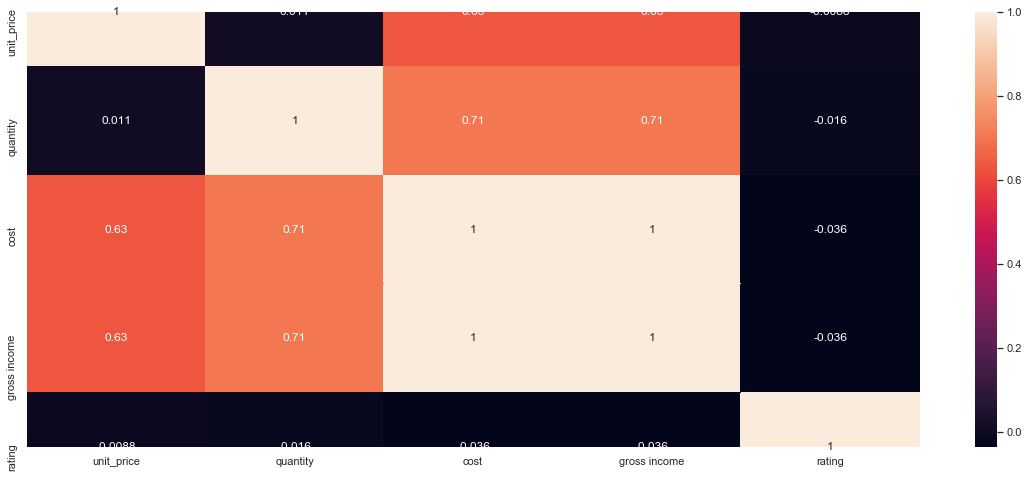

In [5]:
sns.set(rc={'figure.figsize':(20,8)});
sns.heatmap(data.corr(), annot=True)
plt.show()

In [6]:
def distribusi(kolom,data):
    skewness = data.loc[:,kolom].skew()
    print("Kolom {} mempunyai skewness {}.".format(kolom,skewness))
    sns.set(style="ticks")
    f, (ax_box,ax_hist) = plt.subplots(2,sharex=True, figsize=(15,6),
                                      gridspec_kw={"height_ratios":(.15,.85)})
    sns.boxplot(data.loc[~data.loc[:,kolom].isna(),kolom], ax=ax_box, color='r').set_xlabel('')
    sns.distplot(data.loc[~data.loc[:,kolom].isna(),kolom], ax=ax_hist, color='b')
    
    ax_box.set(yticks=[])
    sns.despine(ax=ax_hist)
    sns.despine(ax=ax_box, left=True);

Kolom rating mempunyai skewness 0.009009648765730733.


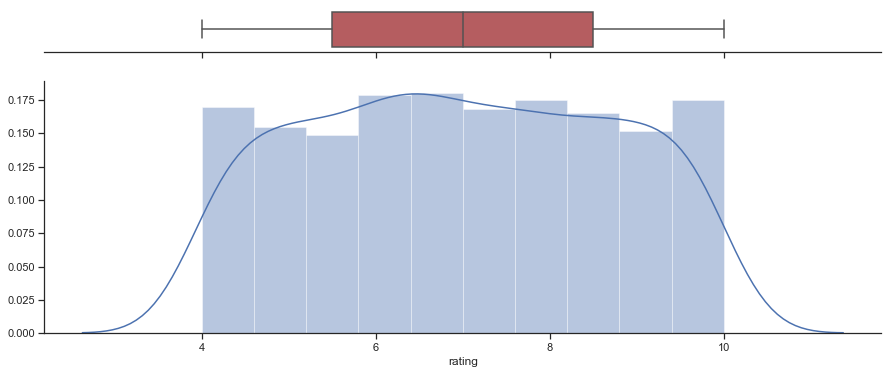

In [7]:
distribusi('rating',data)

Kolom gross income mempunyai skewness 0.8925698049581425.


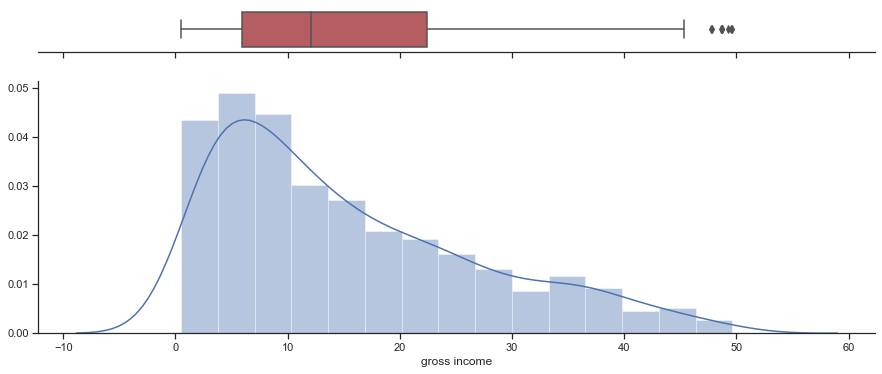

In [8]:
distribusi('gross income',data)

Kolom quantity mempunyai skewness 0.012941048017172432.


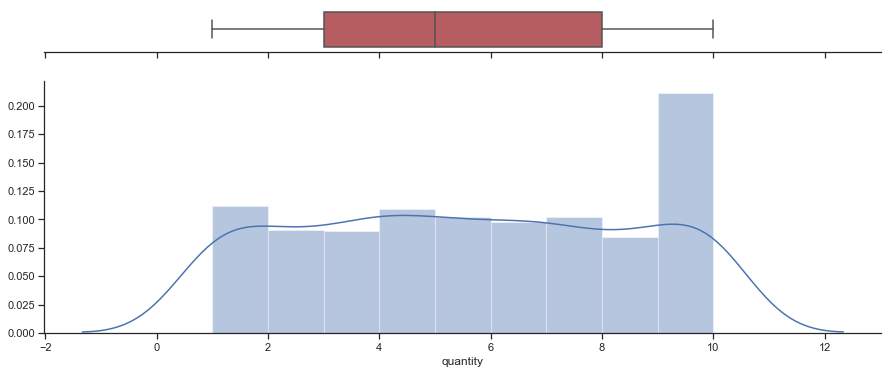

In [9]:
distribusi('quantity',data)

Kolom unit_price mempunyai skewness 0.00707744785332884.


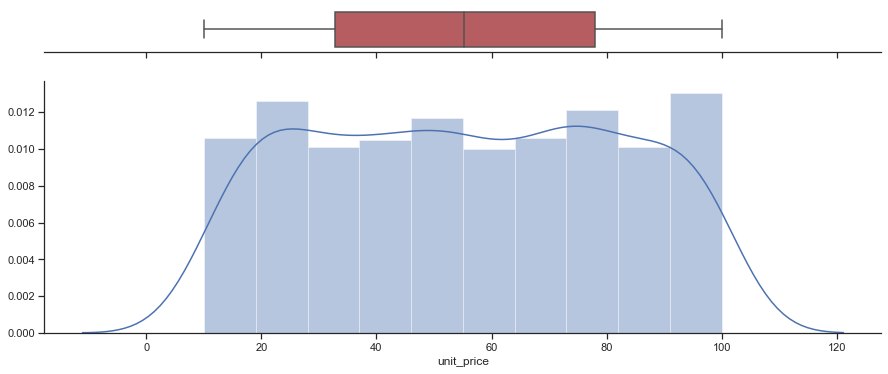

In [10]:
distribusi('unit_price',data)

C:\Users\irfanfadhullah\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\irfanfadhullah\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


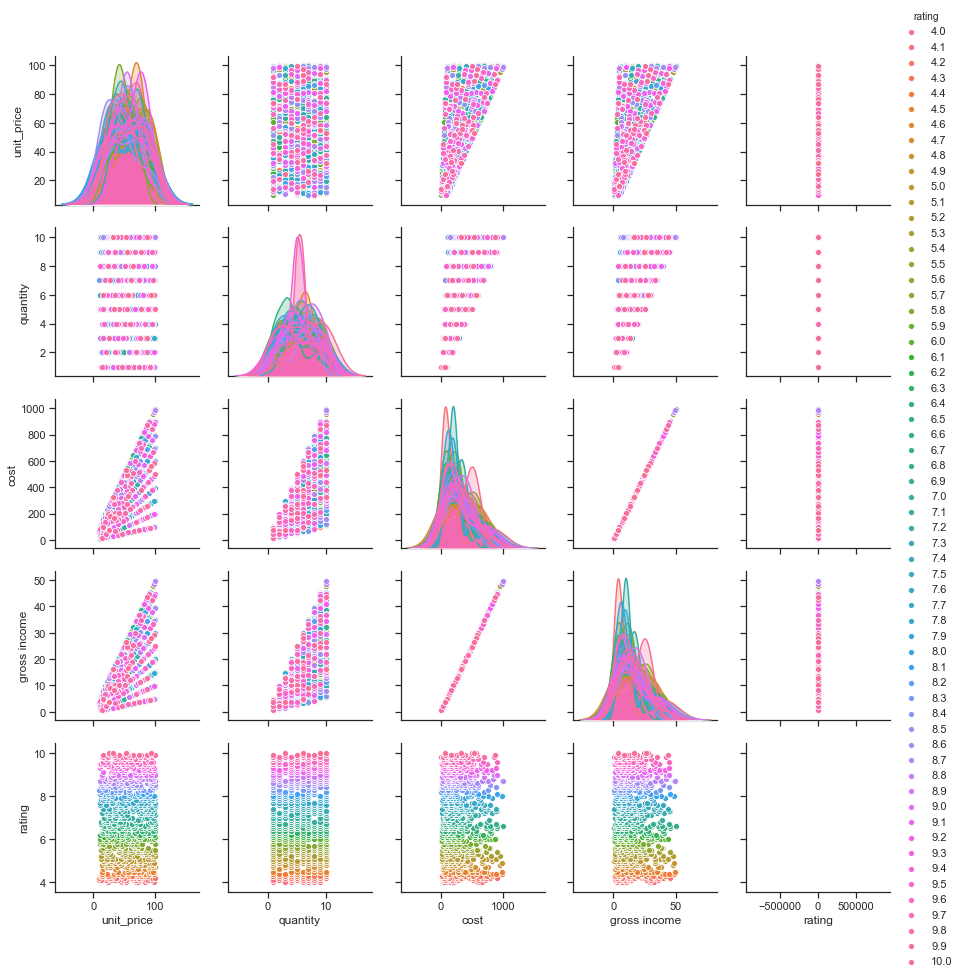

In [11]:
sns.pairplot(data, hue="rating")

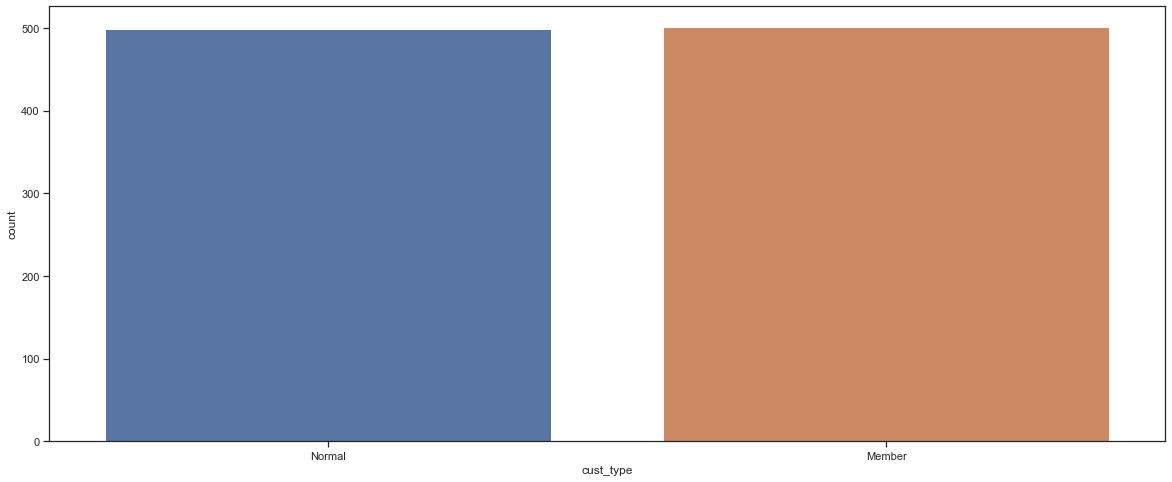

In [12]:
sns.countplot(x=data['cust_type'])

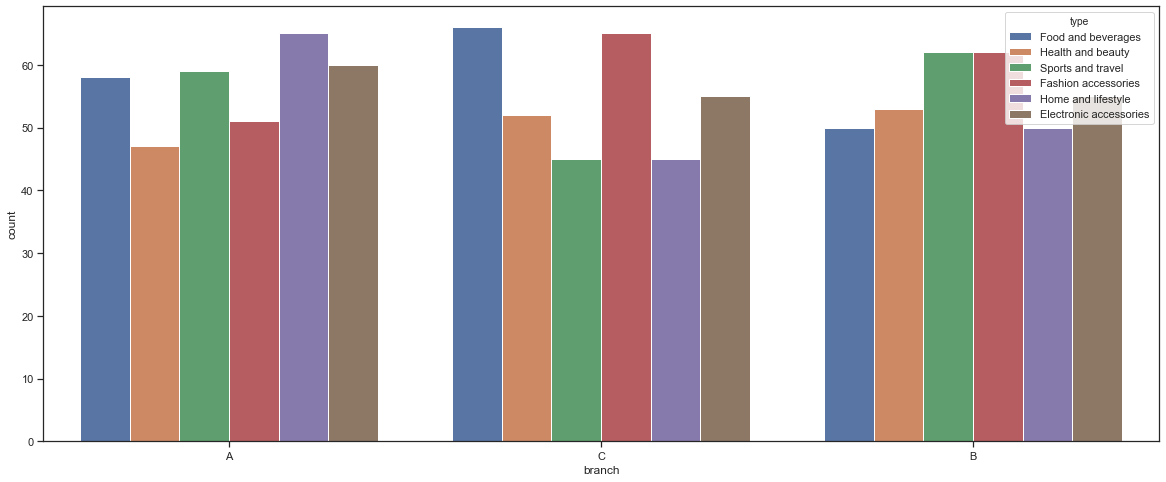

In [13]:
sns.countplot(x=data['branch'],hue=data['type'])

In [14]:
print(data['city'].value_counts())

Cairo         340
Ismailia      332
Alexandria    328
Name: city, dtype: int64


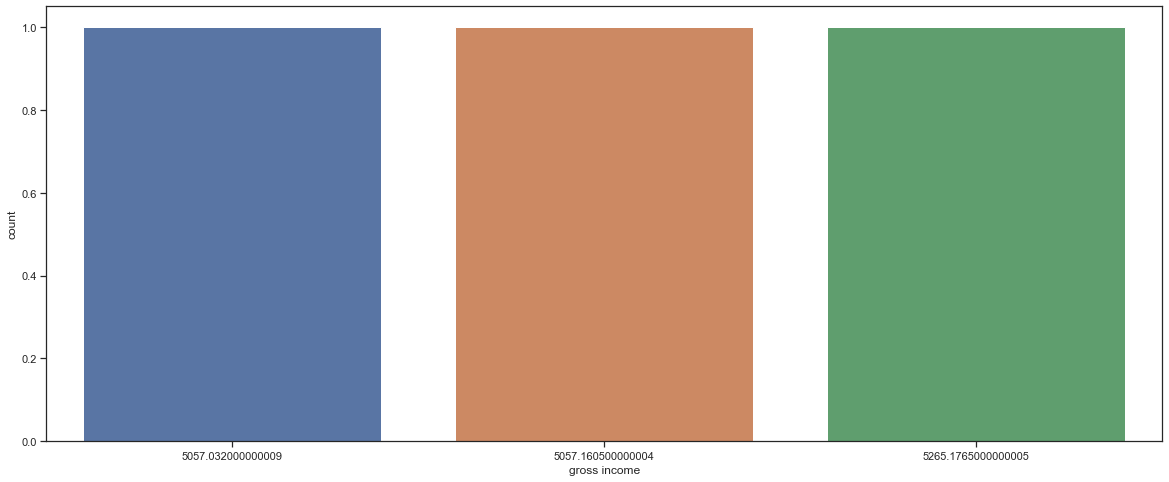

In [15]:
w=data['gross income'].groupby(data['city']).sum()
sns.countplot(x=w)

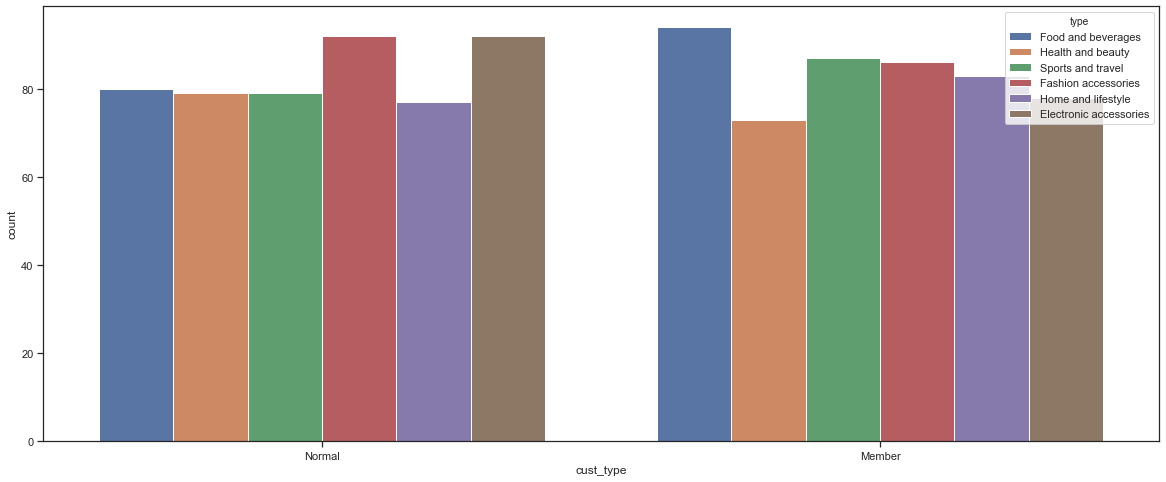

In [16]:
sns.countplot(x=data['cust_type'],hue=data['type'])

In [17]:
import numpy as np

In [18]:
features = data.select_dtypes(include=[np.object])
features.columns

Index(['invoiceID', 'branch', 'city', 'cust_type', 'gender', 'type', 'time',
       'payment'],
      dtype='object')

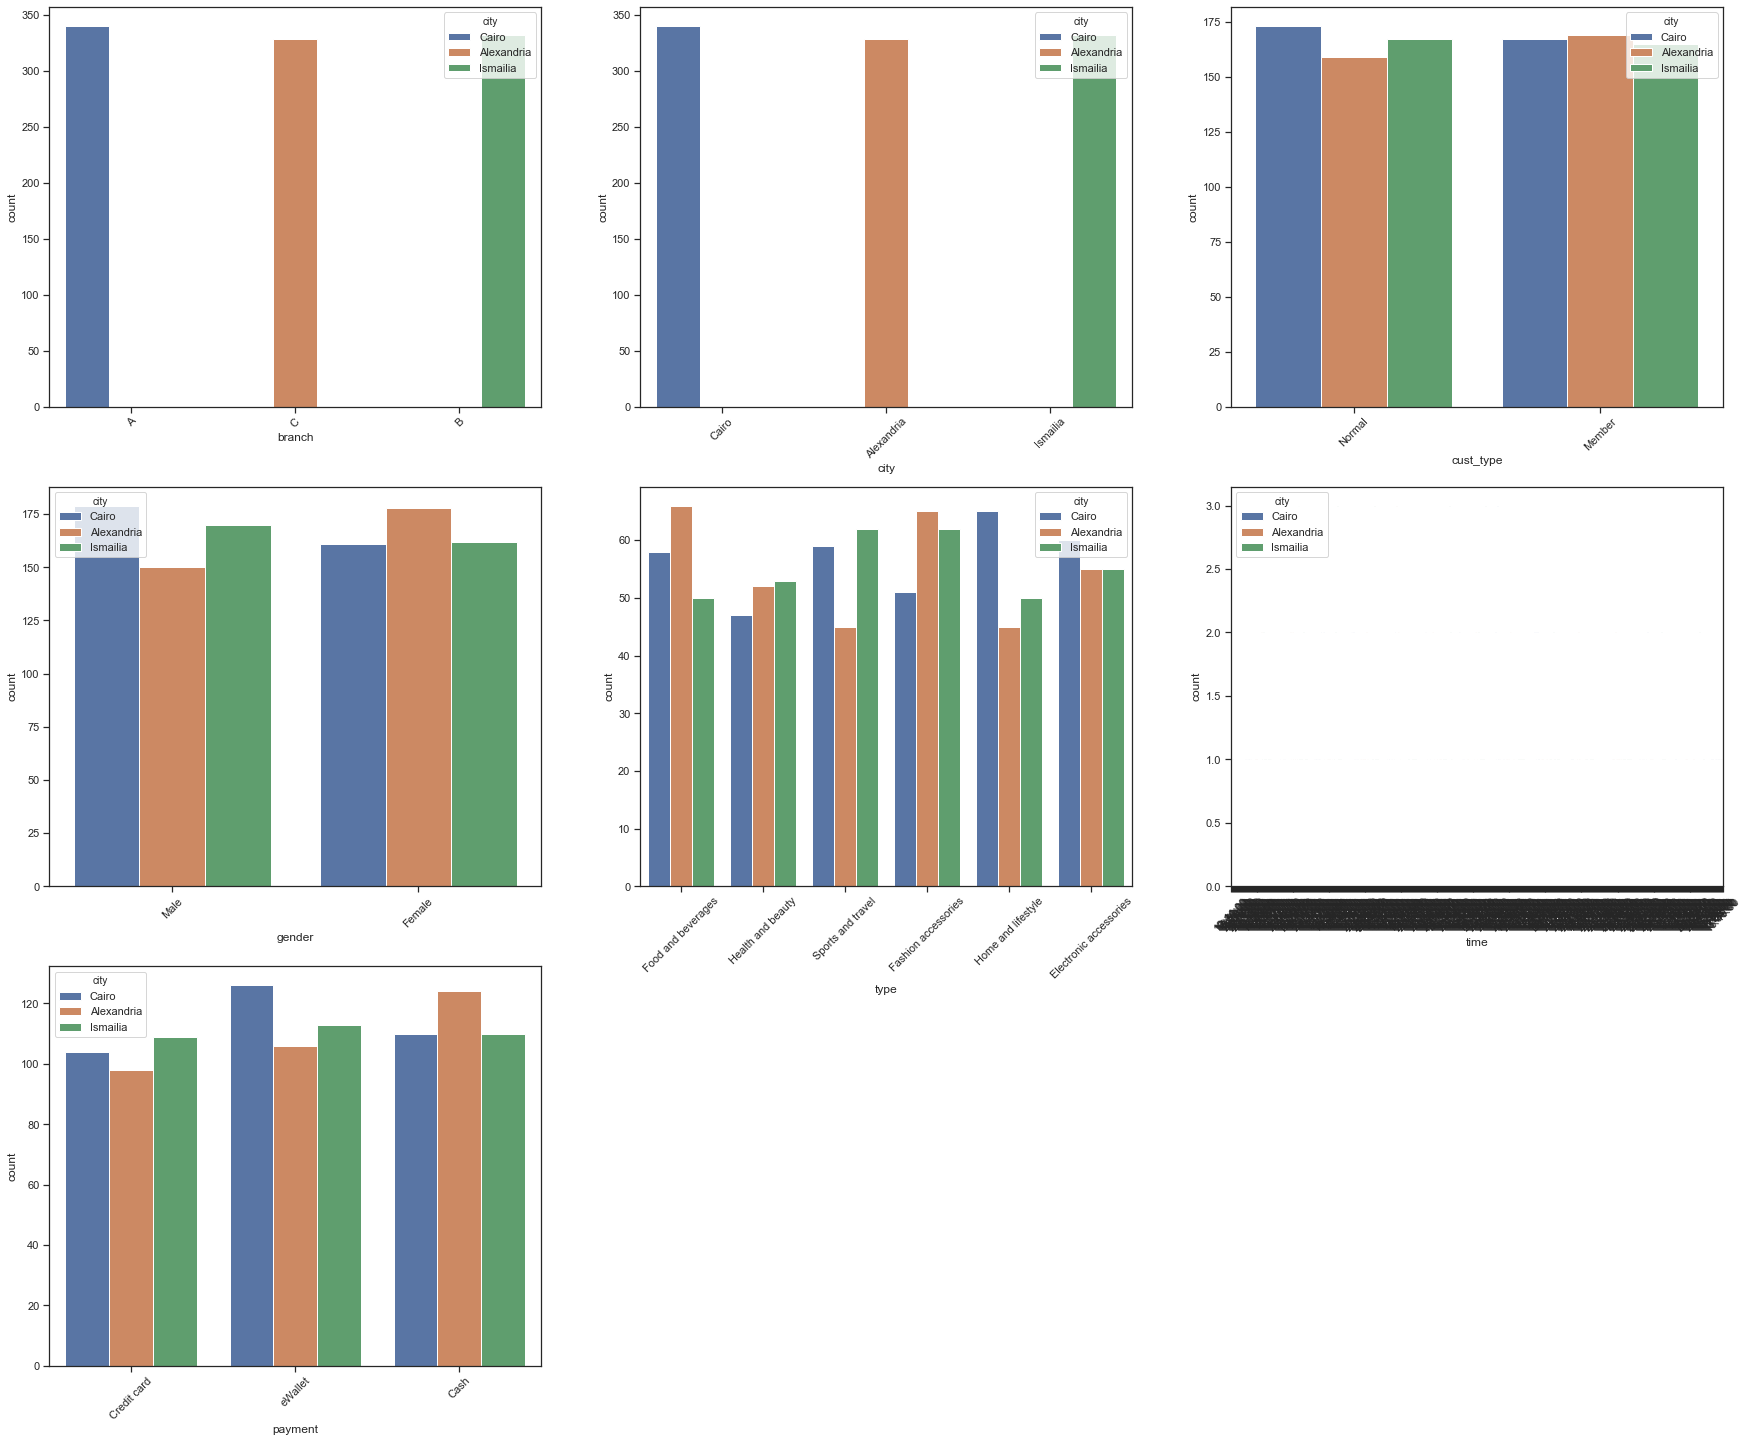

In [19]:
plt.figure(figsize=(30,25))
for i in range(1,len(features.columns)):
    plt.subplot(3,3,i)
    chart=sns.countplot(x=features.columns[i],data=data,hue='city')
    chart.set_xticklabels(chart.get_xticklabels(),rotation=45)

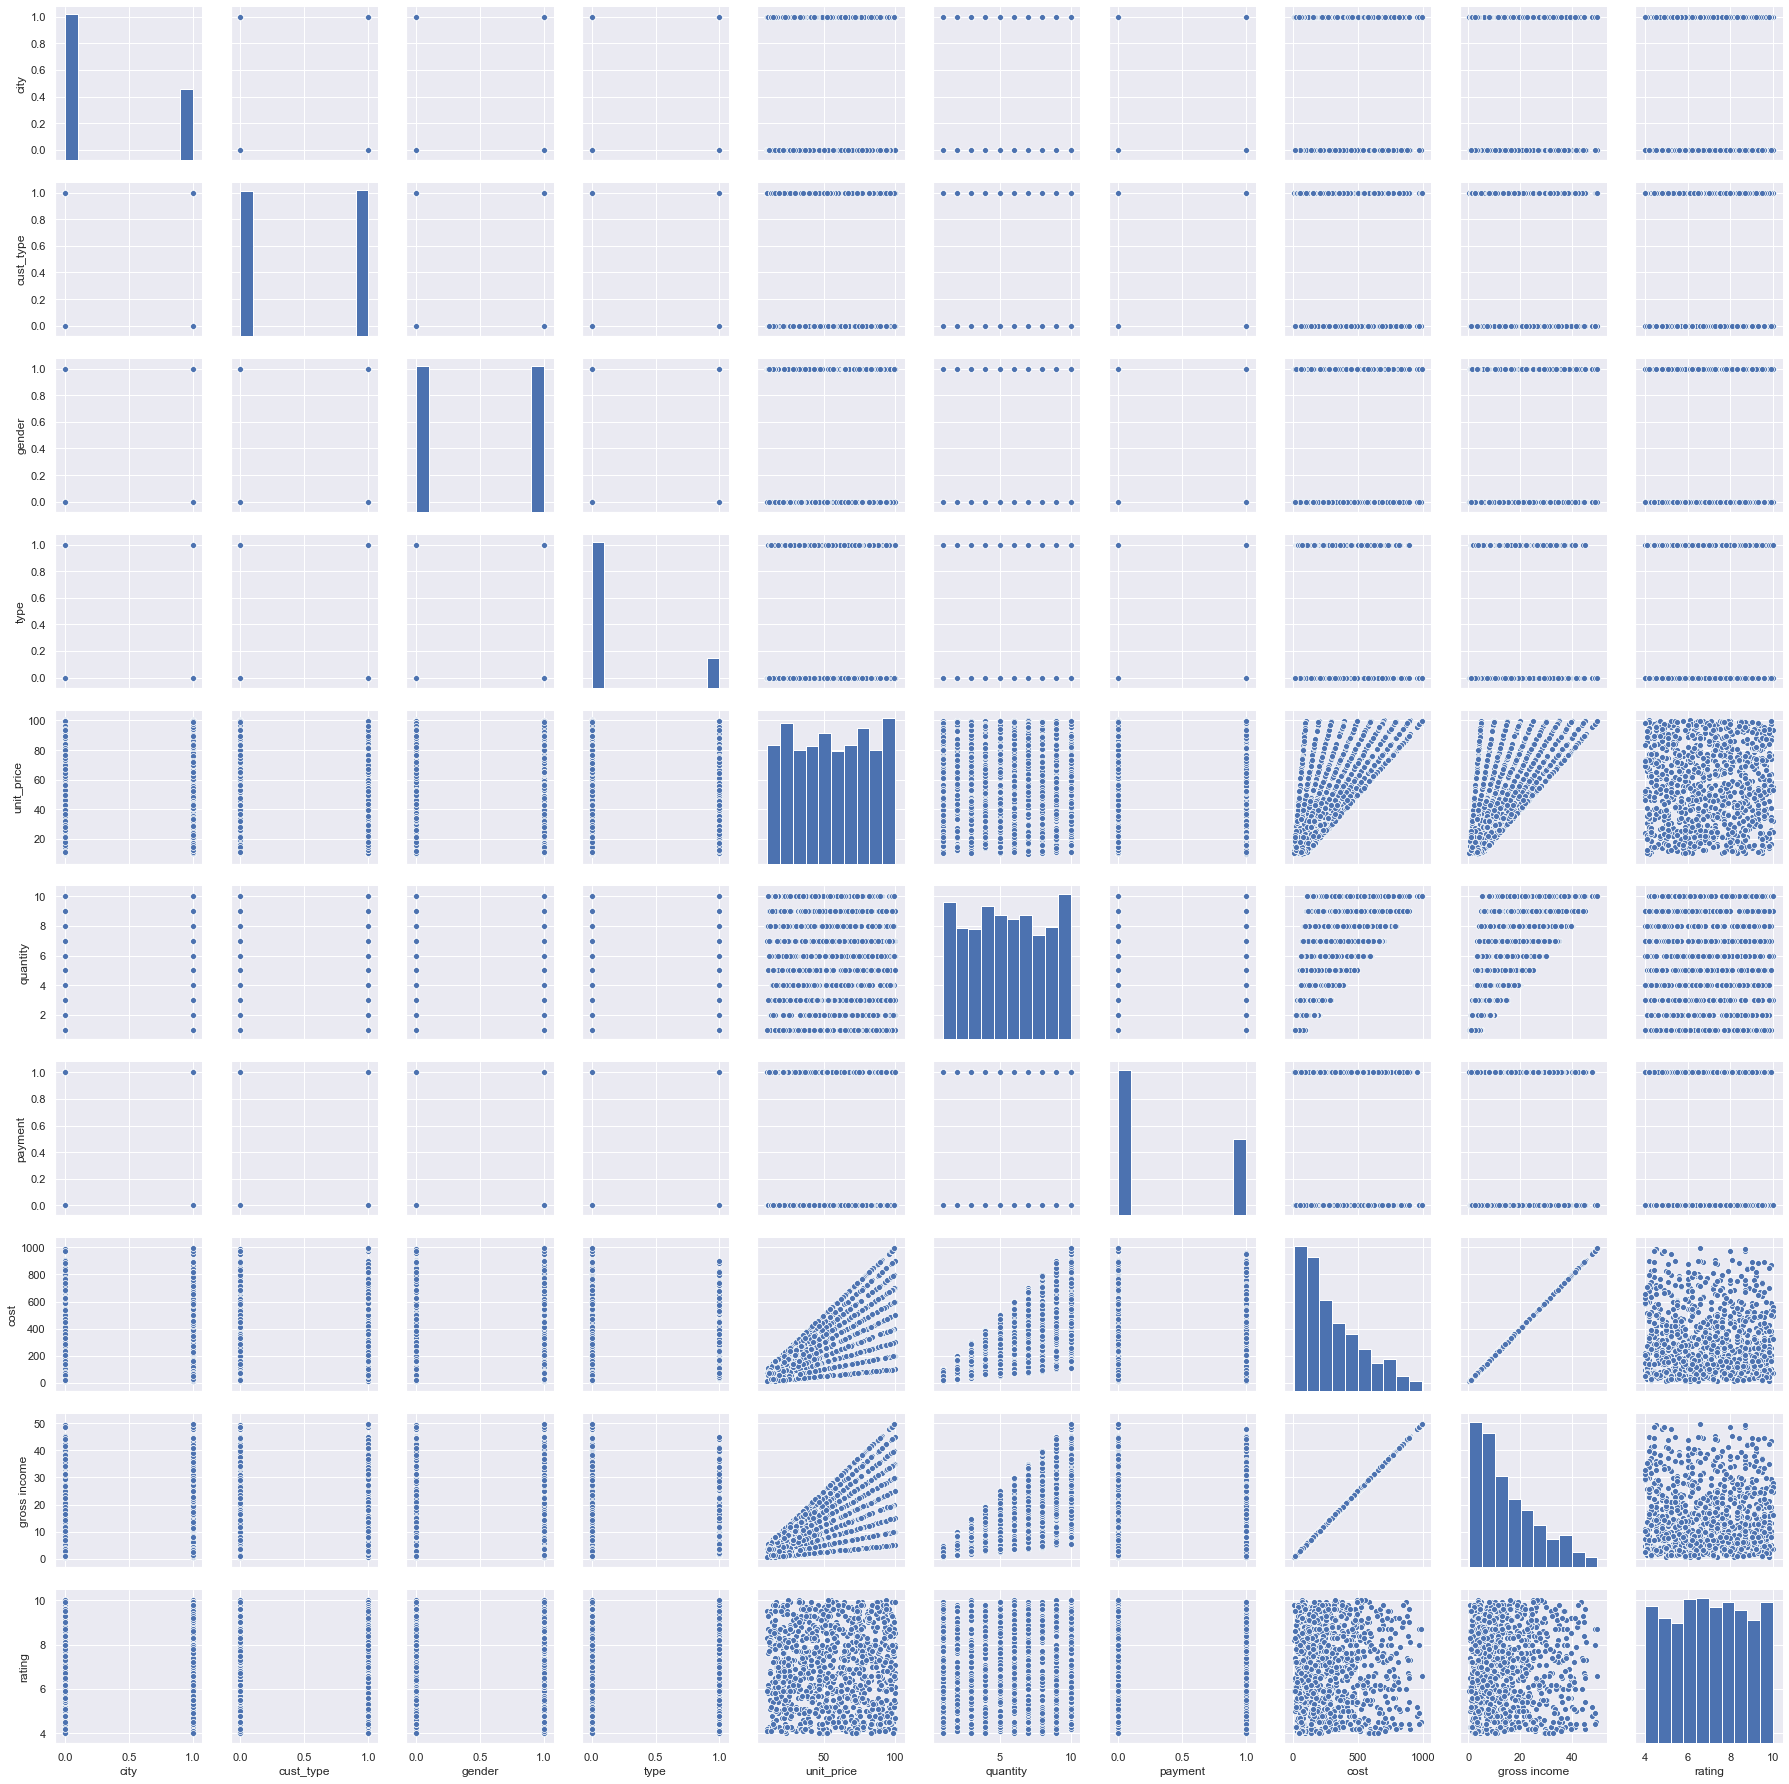

In [67]:
sns.pairplot(data)

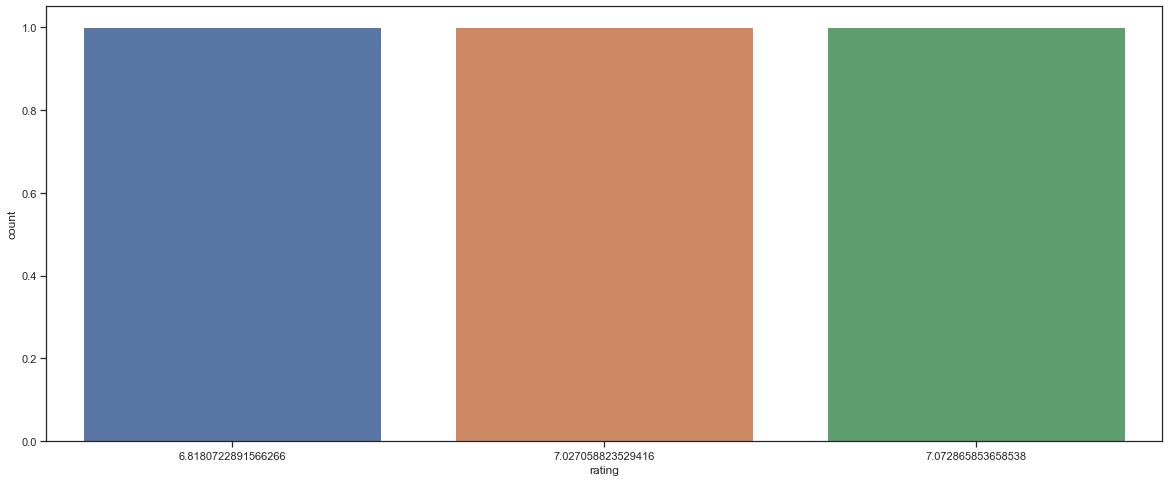

In [20]:
rating=data['rating'].groupby(data['city']).mean()
sns.countplot(x=rating)

In [21]:
rating.head()

city
Alexandria    7.072866
Cairo         7.027059
Ismailia      6.818072
Name: rating, dtype: float64

In [22]:
payment=data['rating'].groupby(data['payment']).mean()
payment

payment
Cash           6.970058
Credit card    7.003215
eWallet        6.947826
Name: rating, dtype: float64

In [23]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')
data['city']=pd.DataFrame(enc.fit_transform(data[['city']]).toarray())
data['cust_type']=pd.DataFrame(enc.fit_transform(data[['cust_type']]).toarray())
data['type']=pd.DataFrame(enc.fit_transform(data[['type']]).toarray())
data['payment']=pd.DataFrame(enc.fit_transform(data[['payment']]).toarray())
data['gender']=pd.DataFrame(enc.fit_transform(data[['gender']]).toarray())

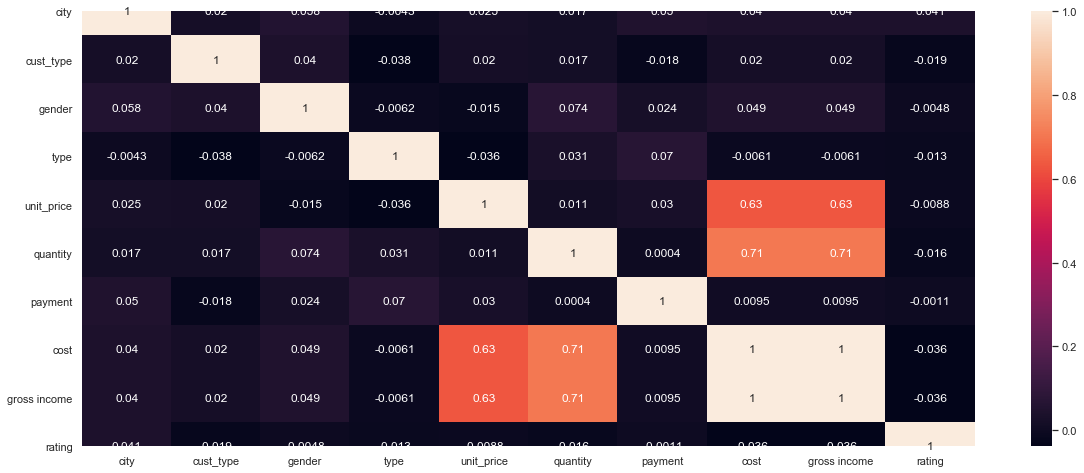

In [24]:
sns.set(rc={'figure.figsize':(20,8)});
sns.heatmap(data.corr(), annot=True)
plt.show()

# Pre Processing

In [25]:
data=data.drop(['invoiceID'],axis=1)

In [26]:
data=data.drop(['branch'],axis=1)

In [30]:
data=data.drop(['date'],axis=1)

In [31]:
data=data.drop(['time'],axis=1)

In [32]:
data

,city,cust_type,gender,type,unit_price,quantity,payment,cost,gross income,rating
0,0.0,0.0,0.0,0.0,45.79,7,0.0,320.53,16.0265,7.0
1,1.0,1.0,1.0,0.0,62.82,2,0.0,125.64,6.2820,4.9
2,1.0,1.0,0.0,0.0,25.25,5,1.0,126.25,6.3125,6.1
3,1.0,1.0,0.0,0.0,65.31,7,0.0,457.17,22.8585,4.2
4,0.0,1.0,0.0,0.0,21.48,2,0.0,42.96,2.1480,6.6
...,...,...,...,...,...,...,...,...,...,...
995,1.0,0.0,1.0,0.0,43.18,8,0.0,345.44,17.2720,8.3
996,0.0,0.0,1.0,0.0,36.51,9,1.0,328.59,16.4295,4.2
997,0.0,1.0,0.0,0.0,18.08,3,0.0,54.24,2.7120,8.0
998,0.0,0.0,0.0,0.0,21.32,1,1.0,21.32,1.0660,5.9


In [40]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
data_scale=scaler.fit_transform(data)
data_scale=pd.DataFrame(data_scale,index=data.index, columns=data.columns)
data_scale.head()

,city,cust_type,gender,type,unit_price,quantity,payment,cost,gross income,rating
0,0.0,0.0,0.0,0.0,0.397308,0.666667,0.0,0.315782,0.315782,0.500000
1,1.0,1.0,1.0,0.0,0.586782,0.111111,0.0,0.117487,0.117487,0.150000
2,1.0,1.0,0.0,0.0,0.168781,0.444444,1.0,0.118108,0.118108,0.350000
3,1.0,1.0,0.0,0.0,0.614486,0.666667,0.0,0.454809,0.454809,0.033333
4,0.0,1.0,0.0,0.0,0.126836,0.111111,0.0,0.033363,0.033363,0.433333


In [76]:
market = data_scale.loc[:, ['cust_type','unit_price','quantity','cost','gross income']]
market.head()

,cust_type,unit_price,quantity,cost,gross income
0,0.0,0.397308,0.666667,0.315782,0.315782
1,1.0,0.586782,0.111111,0.117487,0.117487
2,1.0,0.168781,0.444444,0.118108,0.118108
3,1.0,0.614486,0.666667,0.454809,0.454809
4,1.0,0.126836,0.111111,0.033363,0.033363


In [51]:
feature=market.loc[:,['cust_type','cost','gross income']]

# Modeling

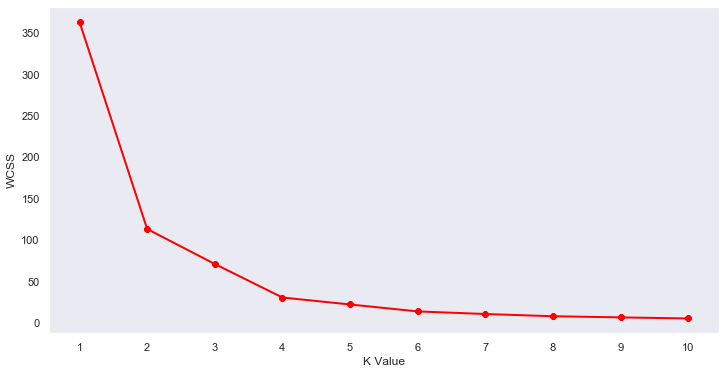

In [52]:
from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(feature)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

## K=4

In [55]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(feature)

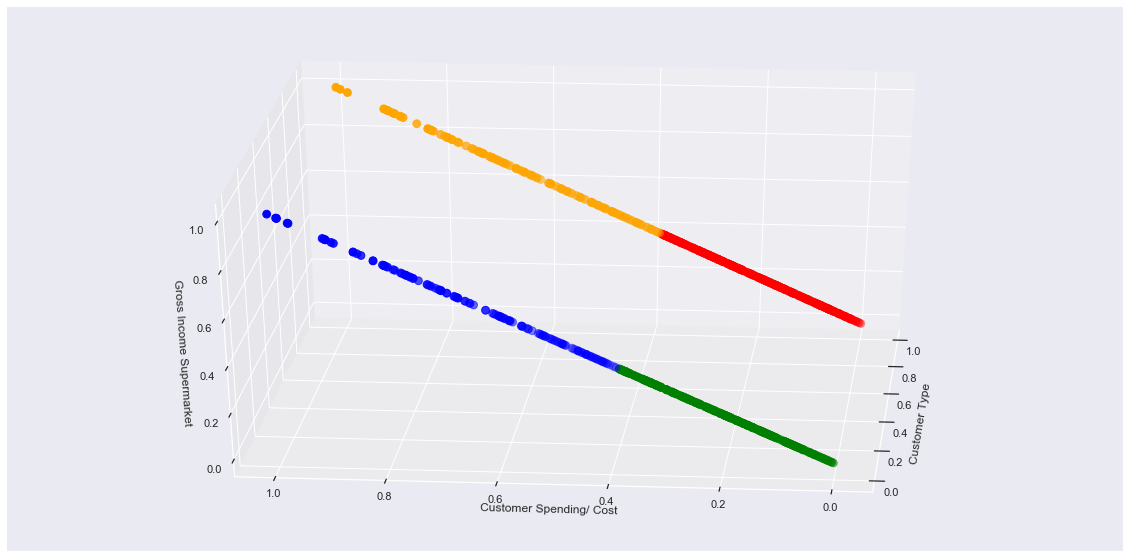

In [57]:
feature["label"] = y_kmeans

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(feature.cust_type[feature.label == 0], feature.cost[feature.label == 0], feature["gross income"][feature.label == 0], c='blue', s=60)
ax.scatter(feature.cust_type[feature.label == 1], feature.cost[feature.label == 1], feature["gross income"][feature.label == 1], c='red', s=60)
ax.scatter(feature.cust_type[feature.label == 2], feature.cost[feature.label == 2], feature["gross income"][feature.label == 2], c='green', s=60)
ax.scatter(feature.cust_type[feature.label == 3], feature.cost[feature.label == 3], feature["gross income"][feature.label == 3], c='orange', s=60)
ax.view_init(30, 185)
plt.xlabel("Customer Type")
plt.ylabel("Customer Spending/ Cost")
ax.set_zlabel('Gross Income Supermarket')
plt.show()

# Feature Beda

In [79]:
f2=market.loc[:,['unit_price','quantity']]

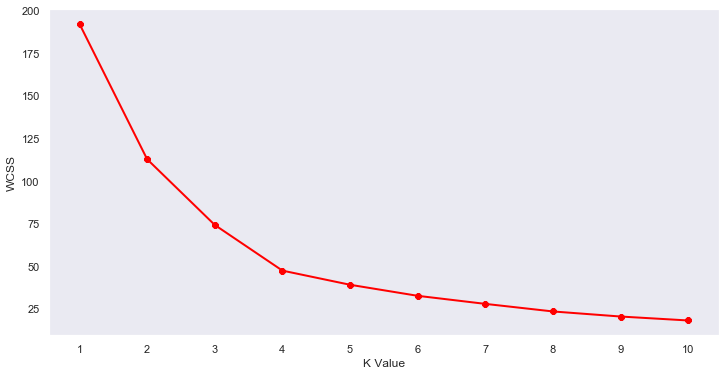

In [80]:
from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(f2)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [81]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(f2)

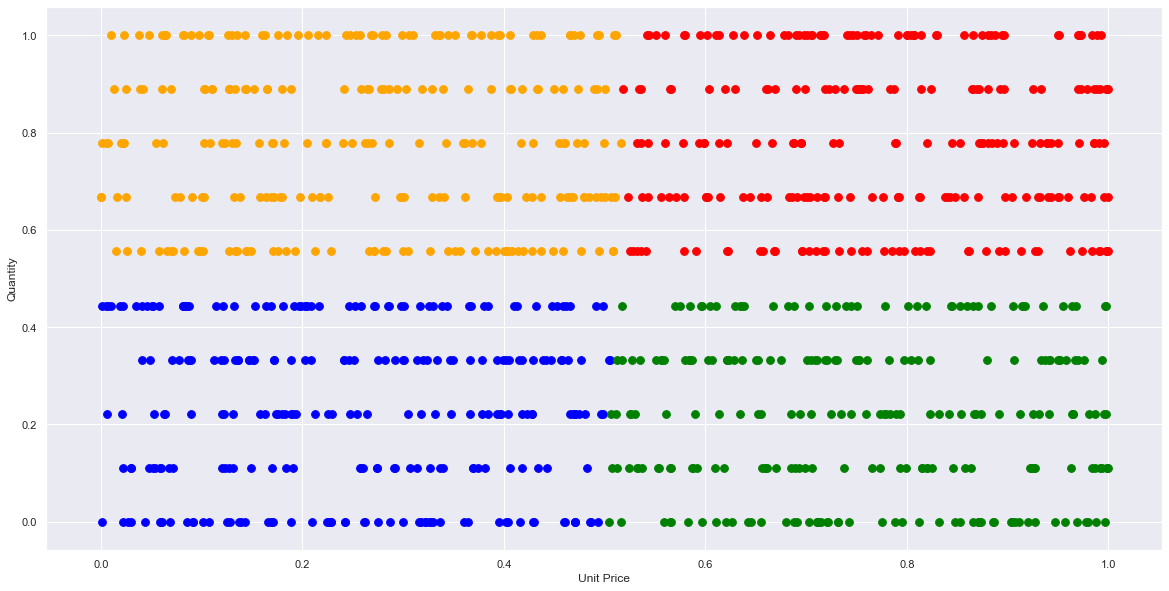

In [82]:
f2["label"] = y_kmeans

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 

fig = plt.figure(figsize=(20,10))
plt.scatter(f2.unit_price[f2.label == 0], f2.quantity[f2.label == 0], c='blue', s=60)
plt.scatter(f2.unit_price[f2.label == 1], f2.quantity[f2.label == 1], c='red', s=60)
plt.scatter(f2.unit_price[f2.label == 2], f2.quantity[f2.label == 2], c='green', s=60)
plt.scatter(f2.unit_price[f2.label == 3], f2.quantity[f2.label == 3], c='orange', s=60)
plt.xlabel("Unit Price")
plt.ylabel("Quantity")
plt.show()

In [83]:
f3=data_scale.loc[:,['cost','gross income','rating']]

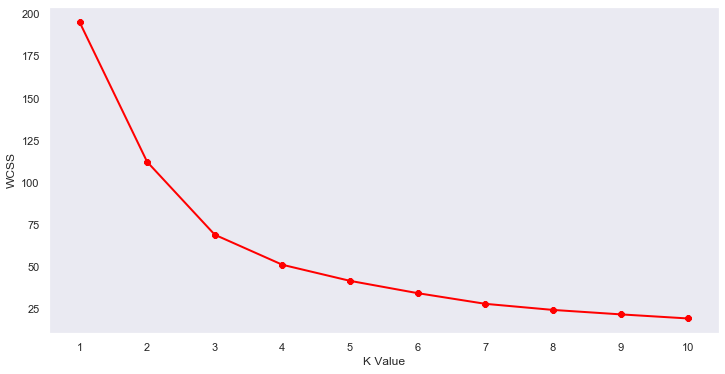

In [84]:
from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(f3)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [85]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(f3)

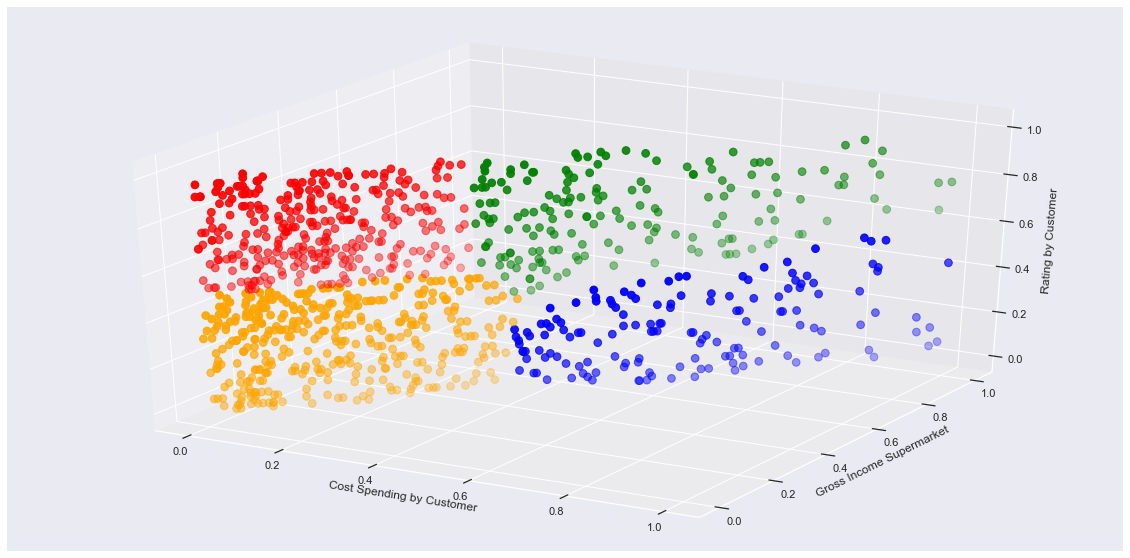

In [87]:
f3["label"] = y_kmeans

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(f3.cost[f3.label == 0], f3['gross income'][f3.label == 0],f3.rating[f3.label == 0], c='blue', s=60)
ax.scatter(f3.cost[f3.label == 1], f3['gross income'][f3.label == 1],f3.rating[f3.label == 1], c='red', s=60)
ax.scatter(f3.cost[f3.label == 2], f3['gross income'][f3.label == 2],f3.rating[f3.label == 2], c='green', s=60)
ax.scatter(f3.cost[f3.label == 3], f3['gross income'][f3.label == 3],f3.rating[f3.label == 3], c='orange', s=60)
plt.xlabel("Cost Spending by Customer")
plt.ylabel("Gross Income Supermarket")
ax.set_zlabel("Rating by Customer")
plt.show()

# Evaluation with Silouete

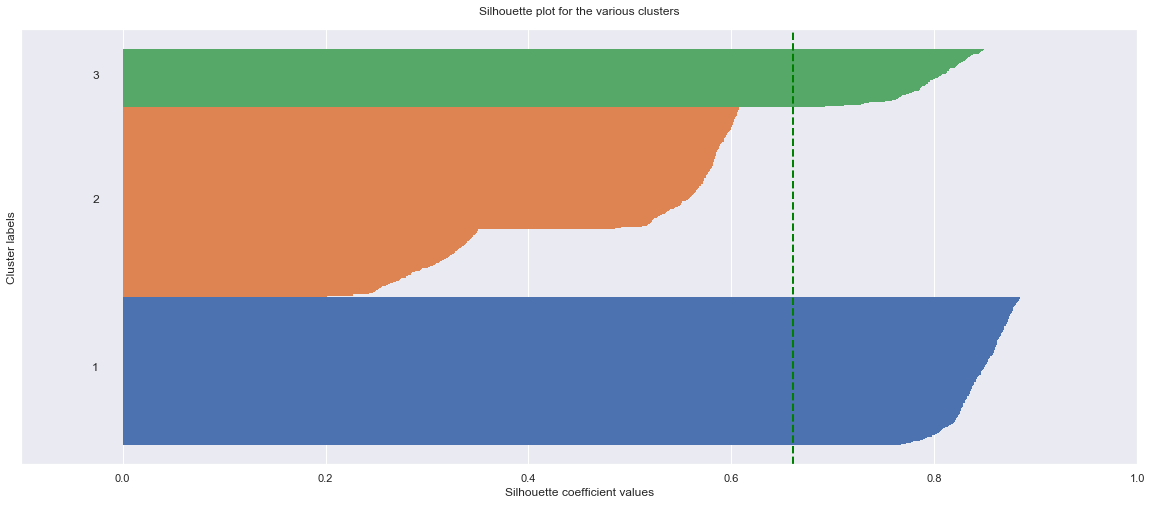

<Figure size 1440x720 with 0 Axes>

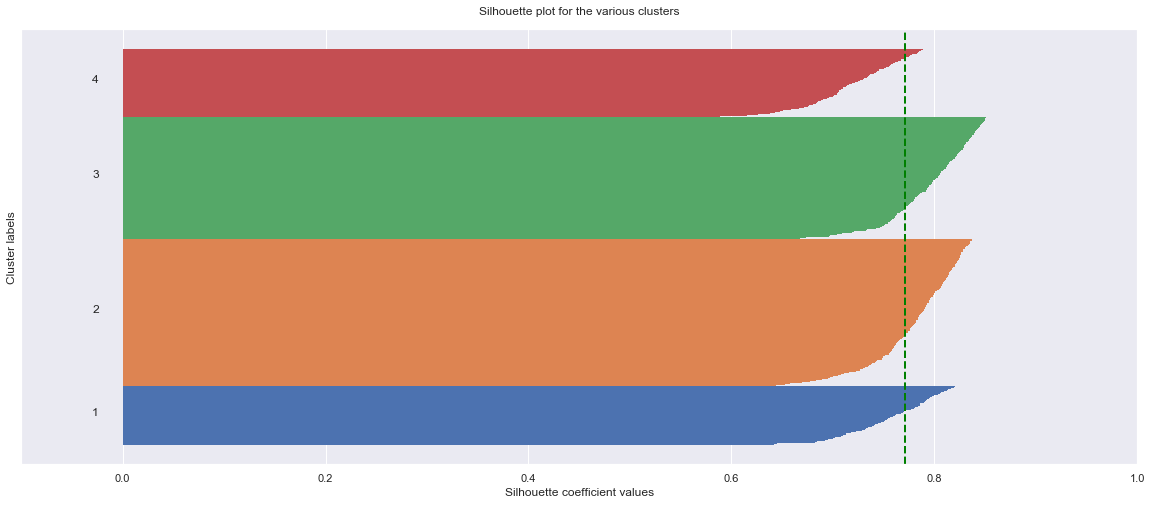

<Figure size 1440x720 with 0 Axes>

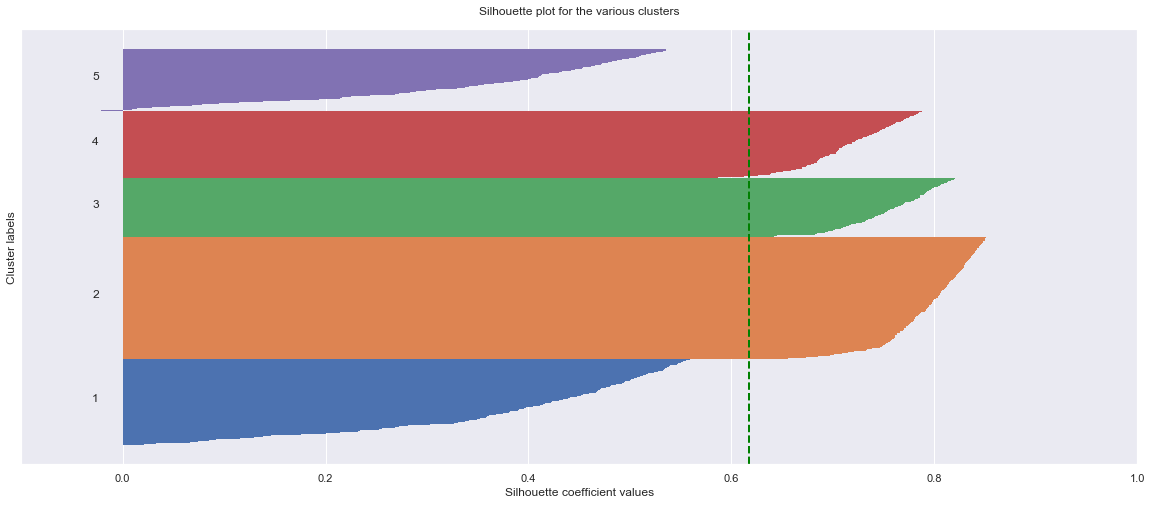

<Figure size 1440x720 with 0 Axes>

In [123]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

for i, k in enumerate([3, 4, 5]):
    
    fig, ax1 = plt.subplots()
    fig = plt.figure(figsize=(20,10))
    
    
    # Run the Kmeans algorithm
    kmeans = KMeans(n_clusters=k)
    labels = kmeans.fit_predict(f3)
    centroids = kmeans.cluster_centers_

    # Get silhouette samples
    silhouette_vals = silhouette_samples(f3, labels)

    # Silhouette plot
    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)

    # Get the average silhouette score and plot it
    avg_score = np.mean(silhouette_vals)
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])
    ax1.set_xlabel('Silhouette coefficient values')
    ax1.set_ylabel('Cluster labels')
    ax1.set_title('Silhouette plot for the various clusters', y=1.02);


# Compare to each number of K

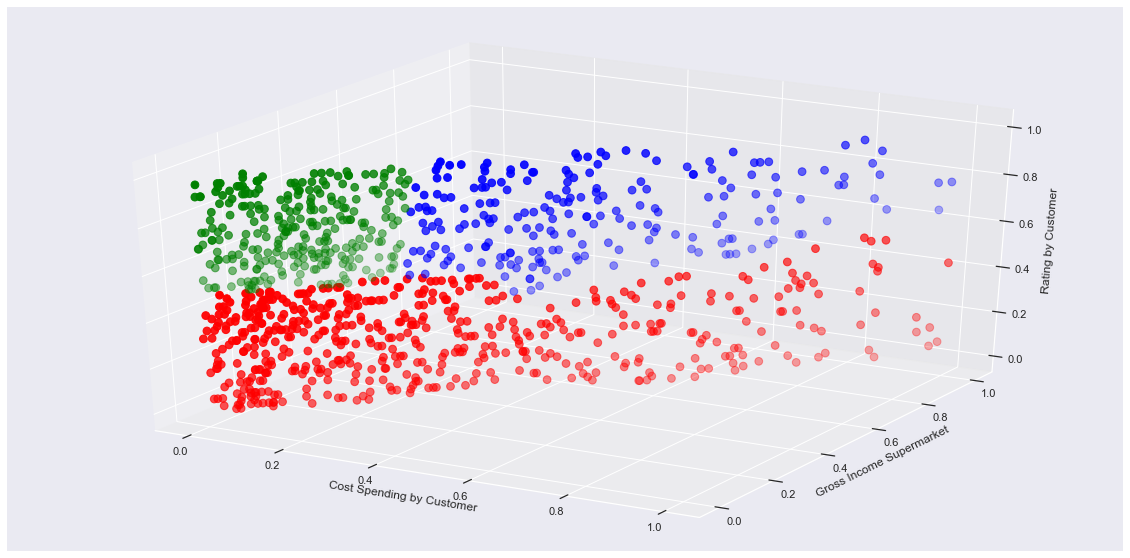

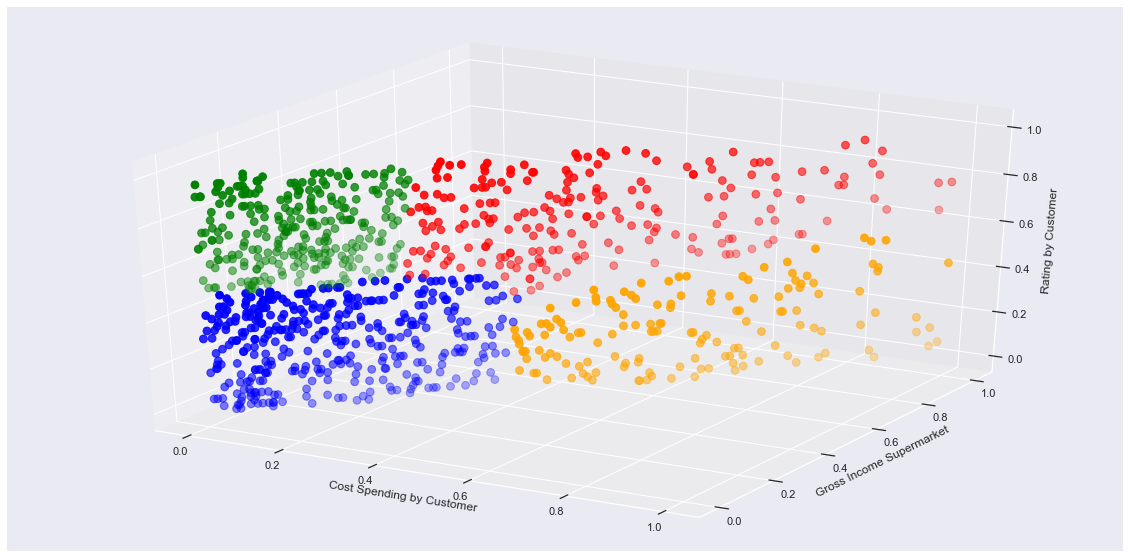

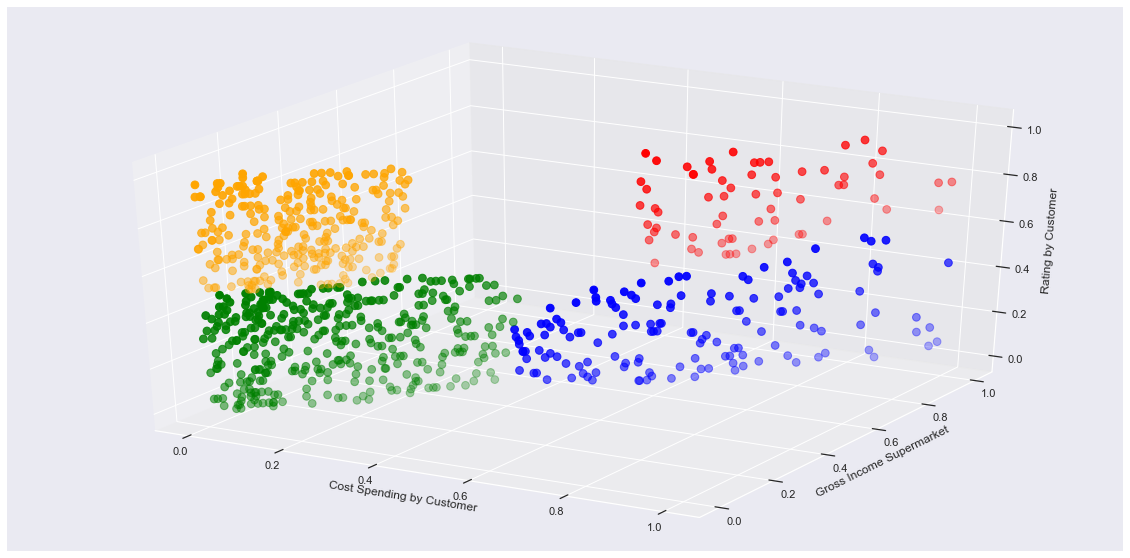

In [125]:
for i, k in enumerate([3,4, 5]):
    kmeans = KMeans(n_clusters = k, init = 'k-means++', random_state = 42)
    y_kmeans = kmeans.fit_predict(f3)
    f3["label"] = y_kmeans

    from mpl_toolkits.mplot3d import Axes3D
    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd
 

    fig = plt.figure(figsize=(20,10))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(f3.cost[f3.label == 0], f3['gross income'][f3.label == 0],f3.rating[f3.label == 0], c='blue', s=60)
    ax.scatter(f3.cost[f3.label == 1], f3['gross income'][f3.label == 1],f3.rating[f3.label == 1], c='red', s=60)
    ax.scatter(f3.cost[f3.label == 2], f3['gross income'][f3.label == 2],f3.rating[f3.label == 2], c='green', s=60)
    ax.scatter(f3.cost[f3.label == 3], f3['gross income'][f3.label == 3],f3.rating[f3.label == 3], c='orange', s=60)
    plt.xlabel("Cost Spending by Customer")
    plt.ylabel("Gross Income Supermarket")
    ax.set_zlabel("Rating by Customer")
    plt.show()